In [ ]:
# https://zhuanlan.zhihu.com/p/559411557
import pandas as pd
 
columns = ["training",   # Treatment assignment indicator
           "age",        # Age of participant
           "education",  # Years of education
           "black",      # Indicate whether individual is black
           "hispanic",   # Indicate whether individual is hispanic
           "married",    # Indicate whether individual is married
           "no_degree",  # Indicate if individual has no high-school diploma
           "re74",       # Real earnings in 1974, prior to study participation
           "re75",       # Real earnings in 1975, prior to study participation
           "re78"]       # Real earnings in 1978, after study end
 
treated = pd.read_csv("nswre74_treated.txt", 
                      delim_whitespace=True, header=None, names=columns)
control = pd.read_csv("nswre74_control.txt",
                      delim_whitespace=True, header=None, names=columns)
lalonde = pd.concat([treated, control], ignore_index=True)
lalonde = lalonde.sample(frac=1.0, random_state=42)  # Shuffle
 
print(lalonde.shape)
lalonde.head()
(445, 10)

(445, 10)


(445, 10)

In [3]:
lalonde = lalonde.join((lalonde[["re74", "re75"]] == 0).astype(int), rsuffix=("=0"))
lalonde.reset_index(inplace=True)
lalonde.head()

,index,training,age,education,black,hispanic,married,no_degree,re74,re75,re78,re74=0,re75=0
0,284,0.0,28.0,12.0,1.0,0.0,1.0,0.0,0.000,0.0000,0.0000,1,1
1,358,0.0,19.0,11.0,1.0,0.0,0.0,1.0,1626.623,0.0000,0.0000,0,1
2,117,1.0,20.0,12.0,1.0,0.0,0.0,0.0,0.000,377.5686,1652.6370,1,0
3,412,0.0,25.0,11.0,1.0,0.0,0.0,1.0,15209.990,3072.7260,284.6584,0,0
4,70,1.0,27.0,9.0,1.0,0.0,0.0,1.0,0.000,0.0000,0.0000,1,1


In [4]:
lalonde = pd.get_dummies(lalonde, columns=["education"], drop_first=True)
print(lalonde.shape)
lalonde.head()


(445, 25)


,index,training,age,black,hispanic,married,no_degree,re74,re75,re78,...,education_7.0,education_8.0,education_9.0,education_10.0,education_11.0,education_12.0,education_13.0,education_14.0,education_15.0,education_16.0
0,284,0.0,28.0,1.0,0.0,1.0,0.0,0.000,0.0000,0.0000,...,0,0,0,0,0,1,0,0,0,0
1,358,0.0,19.0,1.0,0.0,0.0,1.0,1626.623,0.0000,0.0000,...,0,0,0,0,1,0,0,0,0,0
2,117,1.0,20.0,1.0,0.0,0.0,0.0,0.000,377.5686,1652.6370,...,0,0,0,0,0,1,0,0,0,0
3,412,0.0,25.0,1.0,0.0,0.0,1.0,15209.990,3072.7260,284.6584,...,0,0,0,0,1,0,0,0,0,0
4,70,1.0,27.0,1.0,0.0,0.0,1.0,0.000,0.0000,0.0000,...,0,0,1,0,0,0,0,0,0,0


In [5]:
lalonde.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           445 non-null    int64  
 1   training        445 non-null    float64
 2   age             445 non-null    float64
 3   black           445 non-null    float64
 4   hispanic        445 non-null    float64
 5   married         445 non-null    float64
 6   no_degree       445 non-null    float64
 7   re74            445 non-null    float64
 8   re75            445 non-null    float64
 9   re78            445 non-null    float64
 10  re74=0          445 non-null    int64  
 11  re75=0          445 non-null    int64  
 12  education_4.0   445 non-null    uint8  
 13  education_5.0   445 non-null    uint8  
 14  education_6.0   445 non-null    uint8  
 15  education_7.0   445 non-null    uint8  
 16  education_8.0   445 non-null    uint8  
 17  education_9.0   445 non-null    uin

In [6]:
lalonde.describe()

,index,training,age,black,hispanic,married,no_degree,re74,re75,re78,...,education_7.0,education_8.0,education_9.0,education_10.0,education_11.0,education_12.0,education_13.0,education_14.0,education_15.0,education_16.0
count,445.000000,445.000000,445.000000,445.000000,445.00000,445.000000,445.000000,445.000000,445.000000,445.000000,...,445.000000,445.00000,445.000000,445.000000,445.000000,445.000000,445.000000,445.00000,445.000000,445.000000
mean,222.000000,0.415730,25.370787,0.833708,0.08764,0.168539,0.782022,2102.265311,1377.138368,5300.763699,...,0.020225,0.08764,0.152809,0.229213,0.256180,0.168539,0.029213,0.01573,0.002247,0.002247
std,128.604691,0.493402,7.100282,0.372762,0.28309,0.374766,0.413337,5363.582400,3150.960771,6631.491695,...,0.140927,0.28309,0.360208,0.420800,0.437014,0.374766,0.168594,0.12457,0.047405,0.047405
min,0.000000,0.000000,17.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,111.000000,0.000000,20.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,222.000000,0.000000,24.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,3701.812000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,333.000000,1.000000,28.000000,1.000000,0.00000,0.000000,1.000000,824.388900,1220.836000,8124.715000,...,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,444.000000,1.000000,55.000000,1.000000,1.00000,1.000000,1.000000,39570.680000,25142.240000,60307.930000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [12]:
lalonde.groupby("training").describe()

index                                                           age  \
          count   mean        std    min     25%    50%     75%    max  count   
training                                                                        
0.0       260.0  314.5  75.199734  185.0  249.75  314.5  379.25  444.0  260.0   
1.0       185.0   92.0  53.549043    0.0   46.00   92.0  138.00  184.0  185.0   

                     ... education_15.0      education_16.0            \
               mean  ...            75%  max          count      mean   
training             ...                                                
0.0       25.053846  ...            0.0  0.0          260.0  0.000000   
1.0       25.816216  ...            0.0  1.0          185.0  0.005405   

                                             
               std  min  25%  50%  75%  max  
training                                     
0.0       0.000000  0.0  0.0  0.0  0.0  0.0  
1.0       0.073521  0.0  0.0  0.0  0.0  1.0  

[2 rows x 192 columns]

In [13]:
df_control = lalonde[lalonde.training==0]
df_treatment = lalonde[lalonde.training==1]

In [38]:
pip install psmpy

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.tencent.com/pypi/simple
Note: you may need to restart the kernel to use updated packages.


In [8]:
from psmpy import PsmPy
from psmpy.plotting import *

In [9]:
psm = PsmPy(lalonde, treatment='training', indx='index', exclude = [])

In [14]:
# same as my code using balance=False
psm.logistic_ps(balance=False)
psm.predicted_data

,index,age,black,hispanic,married,no_degree,re74,re75,re78,re74=0,...,education_10.0,education_11.0,education_12.0,education_13.0,education_14.0,education_15.0,education_16.0,propensity_score,propensity_logit,training
0,284,28.0,1.0,0.0,1.0,0.0,0.000,0.0000,0.0000,1,...,0,0,1,0,0,0,0,0.484543,-0.061847,0
1,358,19.0,1.0,0.0,0.0,1.0,1626.623,0.0000,0.0000,0,...,0,1,0,0,0,0,0,0.328405,-0.715410,0
2,412,25.0,1.0,0.0,0.0,1.0,15209.990,3072.7260,284.6584,0,...,0,1,0,0,0,0,0,0.288550,-0.902439,0
3,192,34.0,1.0,0.0,1.0,1.0,0.000,0.0000,6040.3350,1,...,0,1,0,0,0,0,0,0.408596,-0.369772,0
4,361,25.0,1.0,0.0,0.0,1.0,5281.245,0.0000,0.0000,0,...,0,1,0,0,0,0,0,0.296327,-0.864852,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,121,18.0,1.0,0.0,0.0,1.0,0.000,798.9079,9737.1540,1,...,1,0,0,0,0,0,0,0.404607,-0.386307,1
441,20,23.0,1.0,0.0,0.0,1.0,0.000,0.0000,0.0000,1,...,0,1,0,0,0,0,0,0.309652,-0.801746,1
442,71,46.0,1.0,0.0,0.0,0.0,0.000,0.0000,647.2046,1,...,0,0,0,1,0,0,0,0.541970,0.168277,1
443,106,27.0,1.0,0.0,0.0,0.0,0.000,0.0000,34099.2800,1,...,0,0,0,1,0,0,0,0.801136,1.393408,1


In [62]:
## replacement=True is 放回
## repacement=False is 不放回
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None)

/home/hessianfang/.local/lib/python3.6/site-packages/psmpy/psmpy.py:363: UserWarning: Some values do not have a match. These are dropped for purposes of establishing a matched dataframe, and subsequent calculations and plots (effect size). If you do not wish this to be the case please set drop_unmatched=False
  warnings.warn('Some values do not have a match. These are dropped for purposes of establishing a matched dataframe, and subsequent calculations and plots (effect size). If you do not wish this to be the case please set drop_unmatched=False')


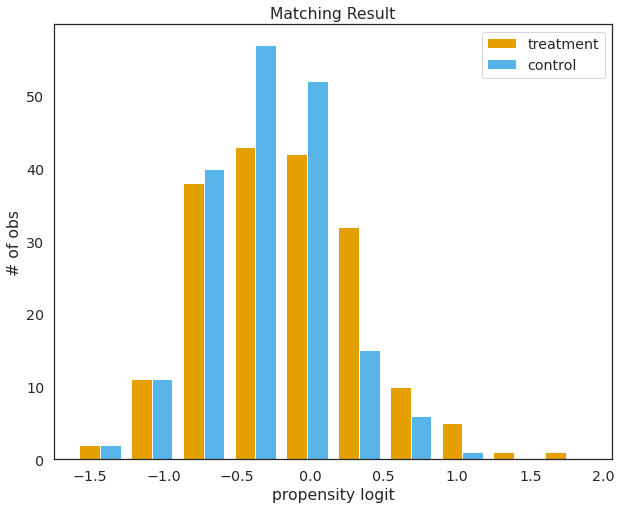

In [63]:
psm.plot_match(Title='Matching Result', Ylabel='# of obs', Xlabel= 'propensity logit', names = ['treatment', 'control'])

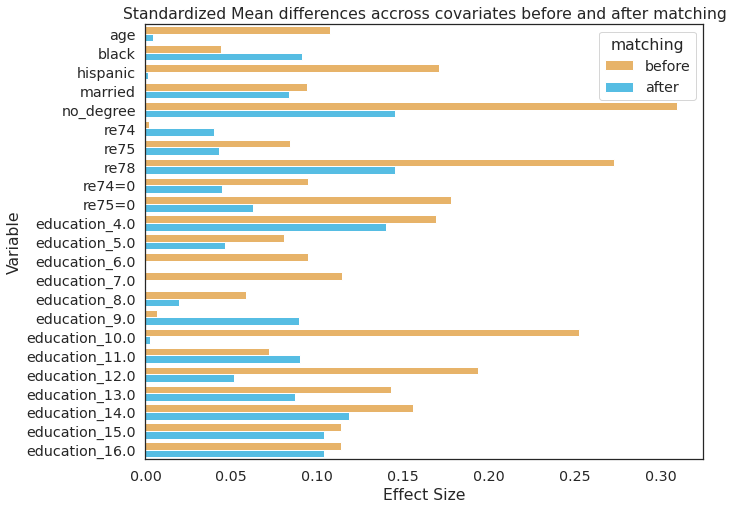

In [64]:
psm.effect_size_plot()

In [65]:
psm.matched_ids

,index,matched_ID
0,117,214
1,70,196
2,30,332
3,79,204
4,55,344
...,...,...
180,121,254
181,20,239
182,71,316
183,106,384


In [66]:
treatment_res = lalonde[lalonde['training']==1]['re78'].mean()

In [67]:
control_res = pd.merge(psm.matched_ids,lalonde,left_on='matched_ID',right_on='index')['re78'].mean()

In [68]:
treatment_res - control_res

1049.2514710270261

In [69]:
control_res

5299.892059243243